## First a very basic binary classification model

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(
    n_samples,
    noise=0.03,
    random_state=42
)

In [3]:
# Check features
X[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
# Check labels (after observation labels are binary)
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [5]:
# Put data into dataframe
import pandas as pd
circles = pd.DataFrame(
    {
        "x0": X[:, 0], "x1": X[:, 1], "label":y
    }
)
circles.head()

,x0,x1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


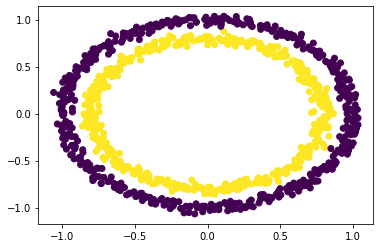

In [6]:
# Visualise data with plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y)

In [7]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [8]:
# Create model
import tensorflow as tf

tf.random.set_seed(42)

input = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(64, activation="relu")(input)
x = tf.keras.layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model = tf.keras.Model(inputs=[input], outputs=[output])

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 64)                192       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Compile and train model
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    metrics=["accuracy"]
)

history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6948 - accuracy: 0.4925
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6887 - accuracy: 0.5025
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - accuracy: 0.5038
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5038
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.5337
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6736 - accuracy: 0.5063
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6674 - accuracy: 0.5038
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6608 - accuracy: 0.5075
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6500 - accuracy: 0.6725
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6368 - accuracy: 0.6988
Epoch 11/

Text(0, 0.5, 'value')

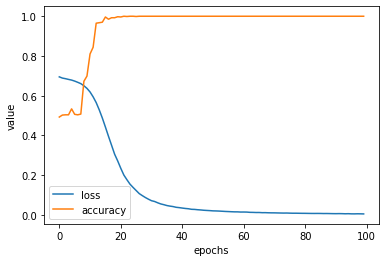

In [10]:
# Plot history

pd.DataFrame(history.history).plot()
plt.xlabel("epochs")
plt.ylabel("value")

In [11]:
# Evaluate model

model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000


[0.005135953426361084, 1.0]

0

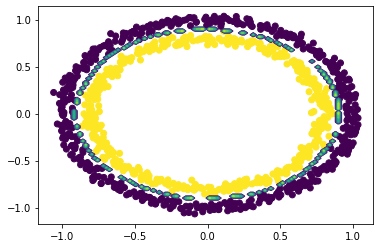

In [12]:
# Plot decision boundary
import numpy as np

# Custom function to create decision boundary
def plot_decision_boundary(model):
  range_x = np.linspace(-1, 1, 100)
  range_y = np.linspace(-1, 1, 100)

  pred_values = np.zeros([100, 100])
  for (i, xi) in enumerate(range_x):
    for (j, yj) in enumerate(range_y):
      p = tf.reshape([xi, yj], shape=(1, 2))
      pred = model(p)
      if abs(pred - 0.5) < 1e-1:
        pred_values[i, j] = pred
  
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.contour(range_x, range_y, pred_values)
  return 0

plot_decision_boundary(model)


##How to find the best learning rate

In [13]:
# Use callbacks to alter the learning rate during training

# Create model which is same as previous
tf.random.set_seed(42)

input = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(64, activation="relu")(input)
x = tf.keras.layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_2 = tf.keras.Model(inputs=[input], outputs=[output])

model_2.summary()

# Compile model
model_2.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_3 (Dense)             (None, 64)                192       
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Create learning rate scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 2**(epoch/20))

In [15]:
# Train model using lr callback
history_2 = model_2.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6912 - accuracy: 0.5050 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5038 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.5038 - lr: 0.0011
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6791 - accuracy: 0.5038 - lr: 0.0011
Epoch 5/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6746 - accuracy: 0.5263 - lr: 0.0011
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6671 - accuracy: 0.5225 - lr: 0.0012
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.6561 - accuracy: 0.5400 - lr: 0.0012
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6388 - accuracy: 0.5500 - lr: 0.0013
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6172 - accuracy: 0.8425 - lr:

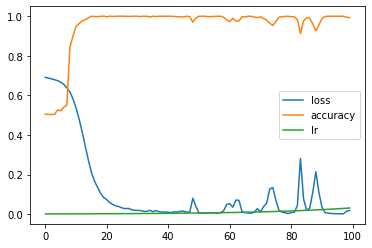

In [16]:
# Plot training history
pd.DataFrame(history_2.history).plot()

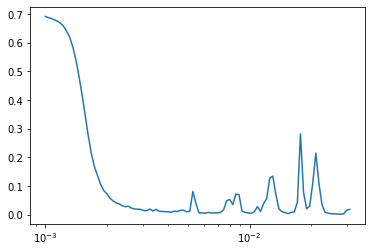

In [17]:
# Plot loss against learning rate
lrs = 1e-3 * 2**(tf.range(100)/20)
plt.semilogx(lrs, history_2.history["loss"])

The loss curve seems to have the steepest downwards gradient at a learning rate value of around 2.5e-3.

Will try to see if a lower loss can be obtained in the same number of epochs as before.

In [18]:
# Create model which is same as previous
tf.random.set_seed(42)

input = tf.keras.layers.Input(shape=(2,))
x = tf.keras.layers.Dense(64, activation="relu")(input)
x = tf.keras.layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_3 = tf.keras.Model(inputs=[input], outputs=[output])

model_3.summary()

# Compile model
model_3.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=2.5e-3),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_6 (Dense)             (None, 64)                192       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,305
Trainable params: 2,305
Non-trainable params: 0
_________________________________________________________________


In [19]:
# Train this new model
model_3.fit(X_train, y_train, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.6947 - accuracy: 0.5013
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6872 - accuracy: 0.5038
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6822 - accuracy: 0.5038
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6723 - accuracy: 0.5063
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6558 - accuracy: 0.6000
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6260 - accuracy: 0.7588
Epoch 7/100
25/25 [==============================] - 0s 2ms/step - loss: 0.5753 - accuracy: 0.8637
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.4893 - accuracy: 0.9250
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss: 0.3871 - accuracy: 0.9887
Epoch 10/100
25/25 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.9937
Epoch 11/

In [20]:
# Evaluate this new model
model_3.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0010 - accuracy: 1.0000


[0.0010127801215276122, 1.0]

In [22]:
# Compare against previous model
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 1.0000


[0.005135953426361084, 1.0]

Both models obtained the same accuracy on the test set. However the new model trained using a higher learning rate had a lower loss on the test set.

## Multi-class Classification

In [29]:
# Create a list of the classifications

class_names = [
    "T-shirt",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Boot"
]
len(class_names)

10

In [84]:
# Get fashion m-nist training and test data

import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Turn label data into one hot encodings
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [85]:
# Show the first training example
print(X_train[0])
print(y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [86]:
# Check shape of single example
X_train[0].shape, y_train[0].shape

((28, 28), TensorShape([10]))

In [87]:
# Visualise one hot encodings
print(y_train)

tf.Tensor(
[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]], shape=(60000, 10), dtype=float32)


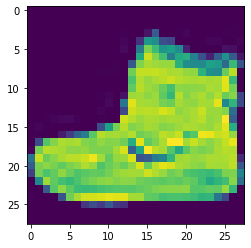

In [88]:
# Plot input image
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

In [89]:
# Create model (not using convolutional layers yet)
tf.random.set_seed(42)

input = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(10, activation="softmax")(x)

model_4 = tf.keras.Model(inputs=[input], outputs=[output])

model_4.summary()

# Compile model
model_4.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_22 (Dense)            (None, 64)                50240     
                                                                 
 dense_23 (Dense)            (None, 32)                2080      
                                                                 
 dense_24 (Dense)            (None, 32)                1056      
                                                                 
 dense_25 (Dense)            (None, 10)                330       
                                                                 
Total params: 53,706
Trainable params: 53,706
Non-trainable

In [90]:
# Train model
history_4 = model_4.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2285 - accuracy: 0.7129
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5611 - accuracy: 0.8051
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5098 - accuracy: 0.8203
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.4691 - accuracy: 0.8331
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4483 - accuracy: 0.8397
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4257 - accuracy: 0.8471
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4125 - accuracy: 0.8498
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3982 - accuracy: 0.8555
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3845 - accuracy: 0.8597
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.375

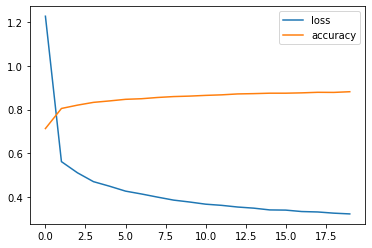

In [91]:
# Visualise training curve
import pandas as pd
pd.DataFrame(history_4.history).plot()

In [92]:
# Evaluate model on test set
model_4.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4064 - accuracy: 0.8605


[0.40644505620002747, 0.8604999780654907]

0

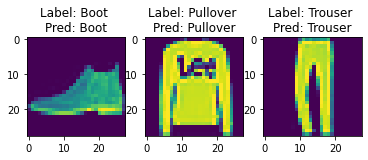

In [93]:
# Visualise model on test set

# Create plot_preds function
def plot_preds(model, X_test, y_test, n):
  true_indexes = tf.math.argmax(y_test, axis=-1)

  probits = model(X_test[:n, :, :])
  preds = tf.math.argmax(probits, axis=-1)

  for i in range(n):
    true_class = class_names[true_indexes[i]]
    pred_class = class_names[preds[i]]

    plt.subplot(1, n, i+1)
    plt.imshow(X_test[i, :, :])
    plt.title(f"Label: {true_class} \nPred: {pred_class}")
  return 0

plot_preds(model_4, X_test, y_test, 3)

In [94]:
# New model (this time training data will be normalised)

from sklearn.preprocessing import normalize

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalise input data
X_train = tf.reshape(X_train, shape=[-1, 28**2])
X_train = normalize(X_train, axis=1)
X_train = tf.reshape(X_train, shape=[-1, 28, 28])

X_test = tf.reshape(X_test, shape=[-1, 28**2])
X_test = normalize(X_test, axis=1)
X_test = tf.reshape(X_test, shape=[-1, 28, 28])

# Turn label data into one hot encodings
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

In [95]:
# Create model (same as last time)

tf.random.set_seed(42)

input = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(input)
x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)
output = tf.keras.layers.Dense(10, activation="softmax")(x)

model_5 = tf.keras.Model(inputs=[input], outputs=[output])

model_5.summary()

# Compile model
model_5.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"]
)

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 32)                2080      
                                                                 
 dense_28 (Dense)            (None, 32)                1056      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 53,706
Trainable params: 53,706
Non-trainable

In [96]:
# Train model
history_5 = model_5.fit(X_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.6011 - accuracy: 0.7860
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4109 - accuracy: 0.8509
Epoch 3/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3708 - accuracy: 0.8644
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3445 - accuracy: 0.8747
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3273 - accuracy: 0.8796
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3133 - accuracy: 0.8848
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3045 - accuracy: 0.8871
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2926 - accuracy: 0.8928
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2848 - accuracy: 0.8949
Epoch 10/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2

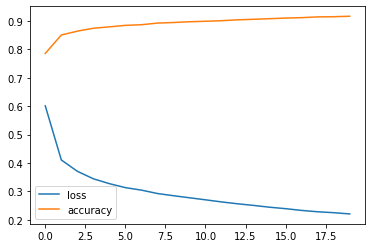

In [97]:
# Visualise training curve
import pandas as pd
pd.DataFrame(history_5.history).plot()

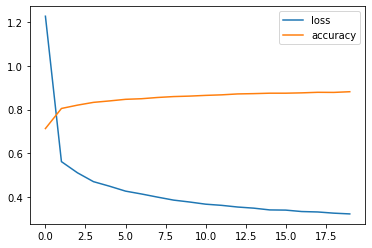

In [98]:
# Compare with previous model training curve
pd.DataFrame(history_4.history).plot()

313/313 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8793


0

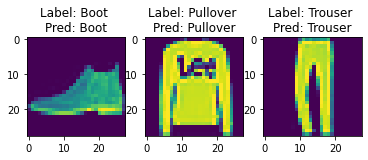

In [101]:
# Evaluate model
model_5.evaluate(X_test, y_test)

plot_preds(model_5, X_test, y_test, 3)

In [104]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix

y_test_true = tf.math.argmax(y_test, axis=-1)
y_test_pred = tf.math.argmax(model_5(X_test), axis=-1)
confusion_matrix(y_test_true, y_test_pred)

array([[854,   4,  11,  18,  13,   1,  92,   0,   6,   1],
       [  0, 969,   0,  21,   5,   0,   2,   0,   2,   1],
       [ 14,   0, 789,  11, 140,   1,  44,   0,   1,   0],
       [ 20,   4,  10, 877,  58,   0,  25,   0,   5,   1],
       [  1,   0,  68,  17, 894,   0,  19,   0,   1,   0],
       [  0,   0,   0,   0,   0, 935,   0,  45,   1,  19],
       [135,   3,  91,  32, 138,   0, 591,   0,  10,   0],
       [  0,   0,   0,   0,   0,   4,   0, 976,   1,  19],
       [  4,   0,   7,   3,   6,   1,   3,   7, 969,   0],
       [  1,   0,   0,   0,   0,   6,   0,  54,   0, 939]])